In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('Adult Census Income_Dataset.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
data.duplicated().sum()

24

In [12]:
df = data.drop_duplicates(keep = 'first')
data.shape

(32561, 15)

In [13]:
data.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [14]:
data['income'] = data['income'].replace({'<=50K':0, '>50K':1})
data.income.value_counts()

C:\Users\mahmo\AppData\Local\Temp\ipykernel_106812\3187566429.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace({'<=50K':0, '>50K':1})


income
0    24720
1     7841
Name: count, dtype: int64

In [15]:
data.drop(columns=['fnlwgt', 'race', 'sex',],inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 
                       'relationship', 'native.country']


for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the encoded DataFrame
print(data)

       age  workclass  education  education.num  marital.status  occupation  \
0       90          3         11              9               6           9   
1       82          3         11              9               6           3   
2       66          3         15             10               6           9   
3       54          3          5              4               0           6   
4       41          3         15             10               5           9   
...    ...        ...        ...            ...             ...         ...   
32556   22          3         15             10               4          10   
32557   27          3          7             12               2          12   
32558   40          3         11              9               2           6   
32559   58          3         11              9               6           0   
32560   22          3         11              9               4           0   

       relationship  capital.gain  capital.loss  ho

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   education       32561 non-null  int32
 3   education.num   32561 non-null  int64
 4   marital.status  32561 non-null  int32
 5   occupation      32561 non-null  int32
 6   relationship    32561 non-null  int32
 7   capital.gain    32561 non-null  int64
 8   capital.loss    32561 non-null  int64
 9   hours.per.week  32561 non-null  int64
 10  native.country  32561 non-null  int32
 11  income          32561 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 2.2 MB


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming 'data' is your DataFrame with all numerical columns
columns = data.columns  # All columns are numerical

# **1. Z-Score Method**
print("Using Z-Score Method:")
# Compute Z-scores for all columns
z_scores = np.abs(data.apply(zscore))

# Identify rows with outliers (Z-score > 3)
outliers_zscore = (z_scores > 3).any(axis=1)

# Count and display outliers
print(f"Number of outliers detected by Z-score: {outliers_zscore.sum()}")
print(f"Rows with outliers (Z-score method):\n{data[outliers_zscore]}")

# **2. IQR Method**
print("\nUsing IQR Method:")
# Compute Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify rows with outliers based on IQR
outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count and display outliers
print(f"Number of outliers detected by IQR: {outliers_iqr.sum()}")
print(f"Rows with outliers (IQR method):\n{data[outliers_iqr]}")

# **3. Box Plot Visualization**
print("\nBox Plot Visualization:")
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()




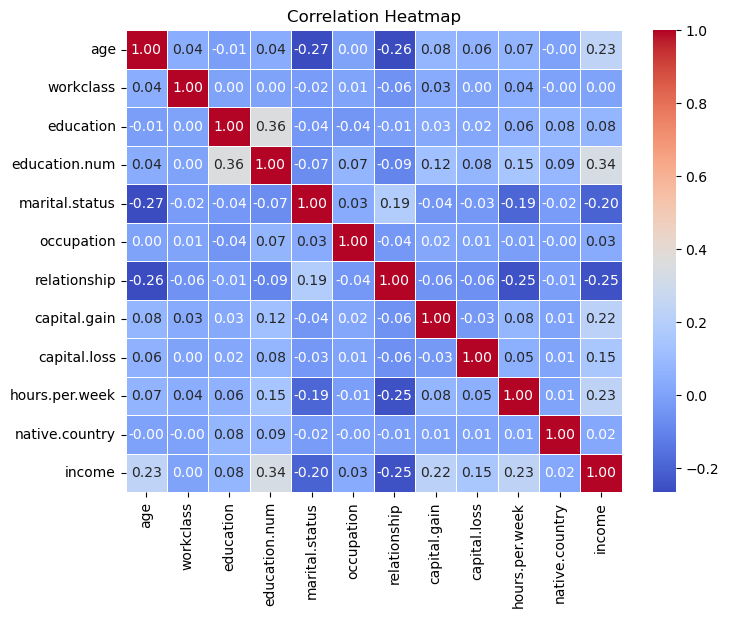

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


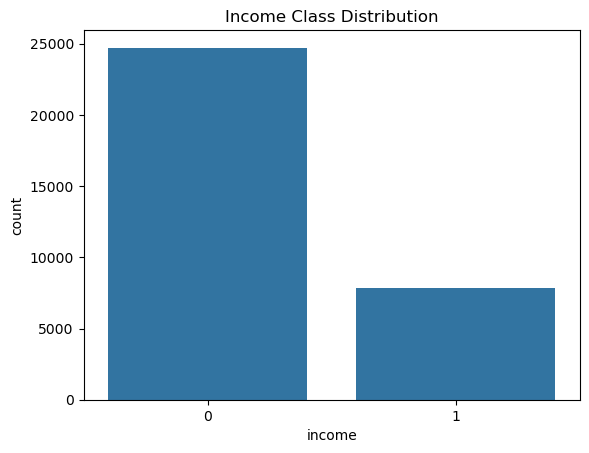

In [21]:
sns.countplot(x='income', data=data)
plt.title('Income Class Distribution')
plt.show()

Logostic 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
X = data.drop(columns=['income']) 
y = data['income'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=10000)  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8209734377399048
Confusion Matrix:
[[4687  289]
 [ 877  660]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4976
           1       0.70      0.43      0.53      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



ROC-AUC Score: 0.84


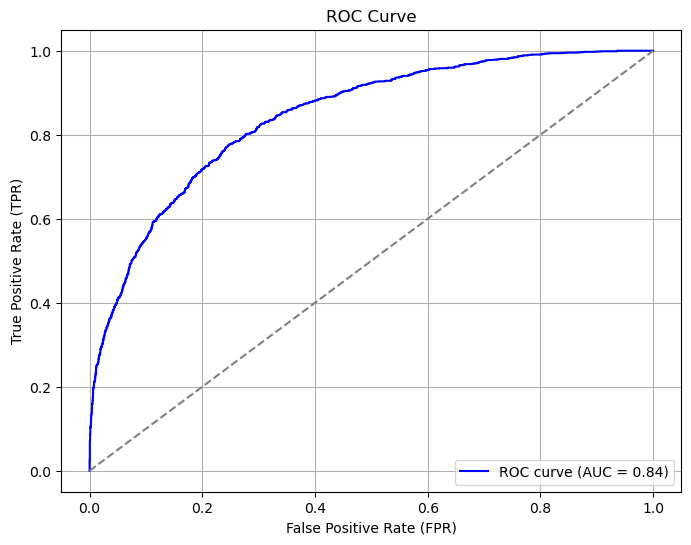

In [25]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class


roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


KNN Model 5 N 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
X1 = data.drop(columns=['income']) 
y1 = data['income'] 

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.2, random_state=42)

model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)
# Calculate the training accuracy
training_accuracy = model1.score(X_train1, y_train1)
print("Training Accuracy with 5 neighbors:", training_accuracy)

# Calculate the testing accuracy
testing_accuracy = model1.score(X_test1, y_test1)
print("Testing Accuracy with 5 neighbors:", testing_accuracy)

Training Accuracy with 5 neighbors: 0.8854806511056511
Testing Accuracy with 5 neighbors: 0.8466144633809305


In [29]:
y_preds1=model1.predict(X_test1)

print(f"Testing score = {accuracy_score(y_test1,y_preds1)}")

Testing score = 0.8466144633809305


In [30]:
accuracy1 = accuracy_score(y_test1, y_preds1)
conf_matrix1 = confusion_matrix(y_test1, y_preds1)
class_report1 = classification_report(y_test1, y_preds1)

# Print the results
print("Confusion Matrix:")
print(conf_matrix1)

print(f"Testing Accuracy = {accuracy1}")

print("Classification Report:")
print(class_report1)

Confusion Matrix:
[[4560  416]
 [ 583  954]]
Testing Accuracy = 0.8466144633809305
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4976
           1       0.70      0.62      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



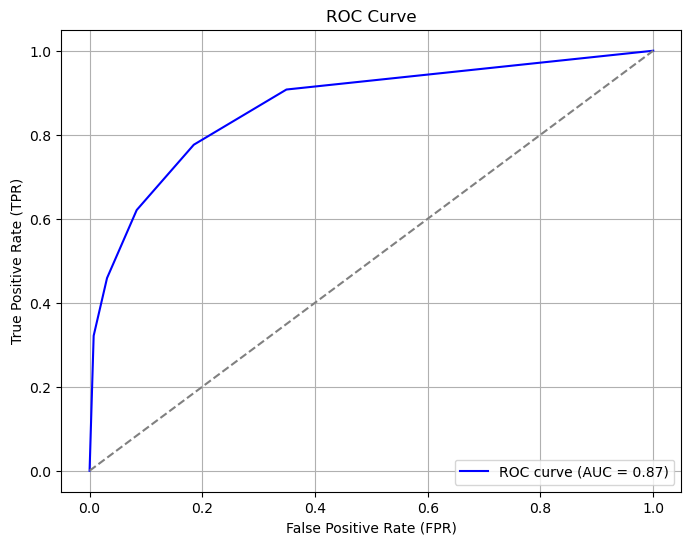

ROC-AUC Score: 0.87


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_preds1 contains the predicted class labels and y_test1 is the true class labels

# For ROC-AUC, we need the predicted probabilities, not just the class labels.
y_probs1 = model1.predict_proba(X_test1)[:, 1]  # Probability estimates for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test1, y_probs1)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"ROC-AUC Score: {auc:.2f}")

Knn 3 n 

In [33]:
X2 = data.drop(columns=['income']) 
y2 = data['income'] 

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=42)

model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train2,y_train2)
# Calculate the training accuracy
training_accuracy2 = model2.score(X_train2, y_train2)
print("Training Accuracy with 3 neighbors:", training_accuracy2)

# Calculate the testing accuracy
testing_accuracy2 = model2.score(X_test2, y_test2)
print("Testing Accuracy with 3 neighbors:", testing_accuracy2)

Training Accuracy with 3 neighbors: 0.9025261056511057
Testing Accuracy with 3 neighbors: 0.8393981268232765


In [34]:
y_preds2=model2.predict(X_test2)

print(f"Testing score = {accuracy_score(y_test2,y_preds2)}")

Testing score = 0.8393981268232765


In [35]:
accuracy2 = accuracy_score(y_test2, y_preds2)
conf_matrix2 = confusion_matrix(y_test2, y_preds2)
class_report2 = classification_report(y_test2, y_preds2)

# Print the results
print("Confusion Matrix:")
print(conf_matrix2)

print(f"Testing Accuracy = {accuracy2}")

print("Classification Report:")
print(class_report2) 

Confusion Matrix:
[[4512  464]
 [ 582  955]]
Testing Accuracy = 0.8393981268232765
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4976
           1       0.67      0.62      0.65      1537

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



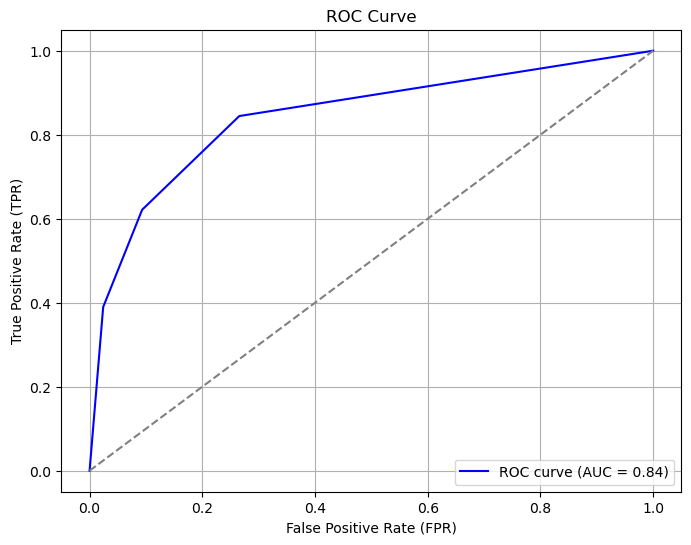

ROC-AUC Score: 0.84


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_preds1 contains the predicted class labels and y_test1 is the true class labels

# For ROC-AUC, we need the predicted probabilities, not just the class labels.
y_probs2 = model2.predict_proba(X_test2)[:, 1]  # Probability estimates for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test2, y_probs2)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"ROC-AUC Score: {auc:.2f}")

KNN 7 N

In [38]:
X3 = data.drop(columns=['income']) 
y3 = data['income'] 

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train3, X_test3, y_train3, y_test3= train_test_split(X3, y3, test_size=0.2, random_state=42)

model3=KNeighborsClassifier(n_neighbors=7)
model3.fit(X_train3,y_train3)
# Calculate the training accuracy
training_accuracy3 = model3.score(X_train3, y_train3)
print("Training Accuracy with 7 neighbors:", training_accuracy3)

# Calculate the testing accuracy
testing_accuracy3 = model3.score(X_test3, y_test3)
print("Testing Accuracy with 7 neighbors:", testing_accuracy3)

Training Accuracy with 7 neighbors: 0.8768043611793612
Testing Accuracy with 7 neighbors: 0.8475356978350991


In [39]:
y_preds3=model3.predict(X_test3)

print(f"Testing score = {accuracy_score(y_test3,y_preds3)}")

Testing score = 0.8475356978350991


In [40]:
accuracy3 = accuracy_score(y_test3, y_preds3)
conf_matrix3 = confusion_matrix(y_test3, y_preds3)
class_report3 = classification_report(y_test3, y_preds3)

# Print the results
print("Confusion Matrix:")
print(conf_matrix3)

print(f"Testing Accuracy = {accuracy3}")

print("Classification Report:")
print(class_report3)

Confusion Matrix:
[[4587  389]
 [ 604  933]]
Testing Accuracy = 0.8475356978350991
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4976
           1       0.71      0.61      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [41]:
accuracy3 = accuracy_score(y_test3, y_preds3)
conf_matrix3 = confusion_matrix(y_test3, y_preds3)
class_report3 = classification_report(y_test3, y_preds3)

# Print the results
print("Confusion Matrix:")
print(conf_matrix3)

print(f"Testing Accuracy = {accuracy3}")

print("Classification Report:")
print(class_report3)

Confusion Matrix:
[[4587  389]
 [ 604  933]]
Testing Accuracy = 0.8475356978350991
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4976
           1       0.71      0.61      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



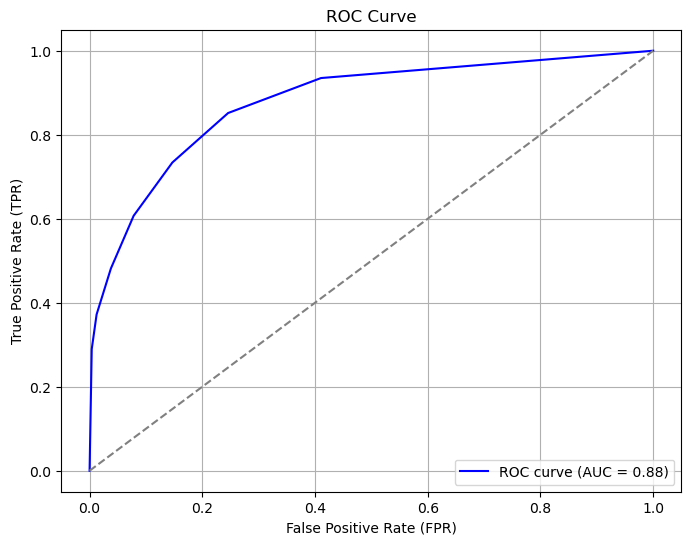

ROC-AUC Score: 0.88


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_preds1 contains the predicted class labels and y_test1 is the true class labels

# For ROC-AUC, we need the predicted probabilities, not just the class labels.
y_probs3 = model3.predict_proba(X_test2)[:, 1]  # Probability estimates for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs3)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test3, y_probs3)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"ROC-AUC Score: {auc:.2f}")

DecisionTreeClassifier

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [45]:
# Create a dataset with 100 samples, 5 features, and 4 classes
# Reduce the number of clusters per class to 1 or increase n_informative to 3
X4, y4 = make_classification(n_samples=100, n_features=5, n_classes=4, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets (33% testing)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)

# Create a Decision Tree classifier
model4 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model
model4.fit(X_train4, y_train4)

# Predict on the test set
y_preds4 = model4.predict(X_test4)

# Calculate accuracy
accuracy4 = accuracy_score(y_test4, y_preds4)

# Print accuracy as a percentage
print(f"Accuracy: {accuracy4 * 100:.2f}%")

Accuracy: 81.82%


In [46]:
print("\nClassification Report:")
print(classification_report(y_test4, y_preds4))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         4
           2       0.45      1.00      0.62         5
           3       1.00      0.73      0.85        15

    accuracy                           0.82        33
   macro avg       0.86      0.88      0.84        33
weighted avg       0.92      0.82      0.84        33



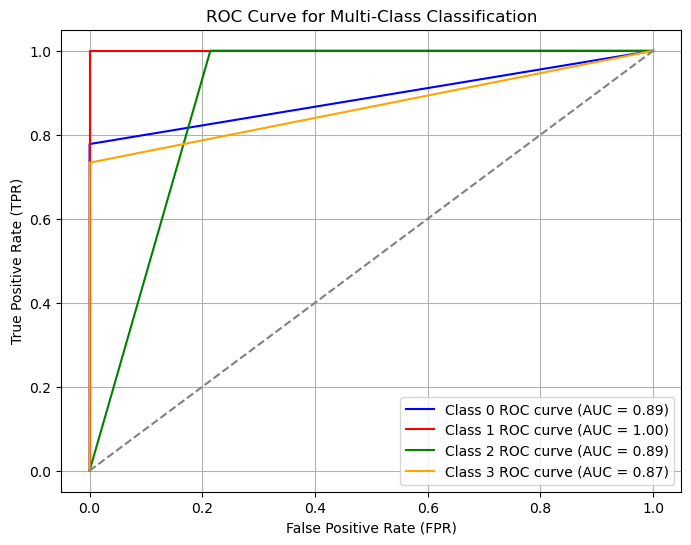

Class 0 ROC-AUC Score: 0.89
Class 1 ROC-AUC Score: 1.00
Class 2 ROC-AUC Score: 0.89
Class 3 ROC-AUC Score: 0.87
Macro-average ROC-AUC Score: 0.91


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming y_preds4 contains the predicted class labels and y_test4 is the true class labels

# For ROC-AUC, we need the predicted probabilities, not just the class labels.
y_probs4 = model4.predict_proba(X_test4)  # Probability estimates for all classes

# Binarize the true labels for multi-class ROC AUC
y_test_binarized = label_binarize(y_test4, classes=[0, 1, 2, 3])

# Calculate the ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs4[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_probs4[:, i])

# Calculate the average AUC (macro average)
macro_auc = roc_auc_score(y_test_binarized, y_probs4, average='macro', multi_class='ovr')

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})', color=colors[i])

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the plot labels and title
plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC score for each class and the macro average AUC
for i in range(4):
    print(f"Class {i} ROC-AUC Score: {roc_auc[i]:.2f}")

print(f"Macro-average ROC-AUC Score: {macro_auc:.2f}")



Svm 

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X5 = data.drop(columns=['income'])  
y5 = data['income'] 
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.33, random_state=42)
svm = SVC()

# Train the SVM model
svm.fit(X_train5, y_train5)

# Make predictions on the test set
y_preds5 = svm.predict(X_test5)

# Calculate the accuracy
accuracy5 = accuracy_score(y_test5, y_preds5)

# Print the accuracy
print(f"Accuracy: {accuracy5 * 100:.2f}%")


Accuracy: 80.15%


In [50]:
print("\nClassification Report:")
print(classification_report(y_test5, y_preds5))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      8150
           1       0.74      0.27      0.40      2596

    accuracy                           0.80     10746
   macro avg       0.77      0.62      0.64     10746
weighted avg       0.79      0.80      0.76     10746



Naive Bayes Bonus 

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare X7 and y7
X7 = data.drop(columns=['income'])  # Features
y7 = data['income']  # Target

# Split data into train and test sets
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Train Naive Bayes model
model7 = GaussianNB()
model7.fit(X_train7, y_train7)

# Make predictions
y_pred7 = model7.predict(X_test7)

# Evaluate the model
print("Accuracy of model7:", accuracy_score(y_test7, y_pred7))
print("\nClassification Report for model7:\n", classification_report(y_test7, y_pred7))
print("\nConfusion Matrix for model7:\n", confusion_matrix(y_test7, y_pred7))


Accuracy of model7: 0.7985567326884692

Classification Report for model7:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4976
           1       0.66      0.31      0.42      1537

    accuracy                           0.80      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.80      0.77      6513


Confusion Matrix for model7:
 [[4728  248]
 [1064  473]]


RandomForestClassifier Bonus  

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Accuracy: 0.8481498541378781

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4976
           1       0.70      0.62      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513


Confusion Matrix:
 [[4574  402]
 [ 587  950]]


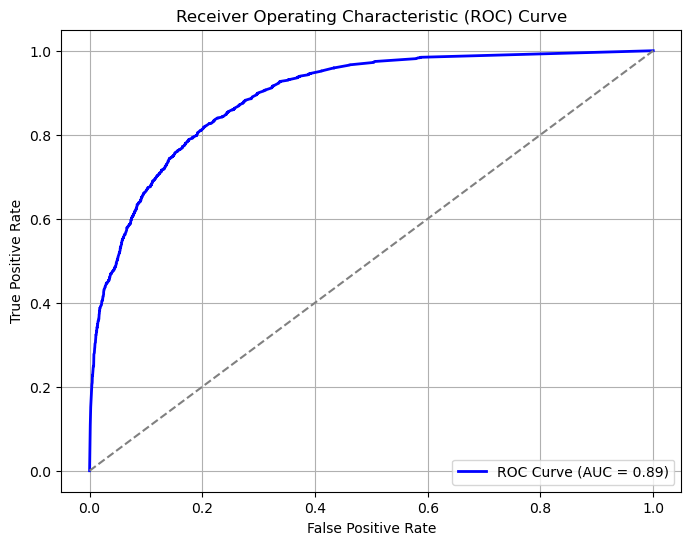

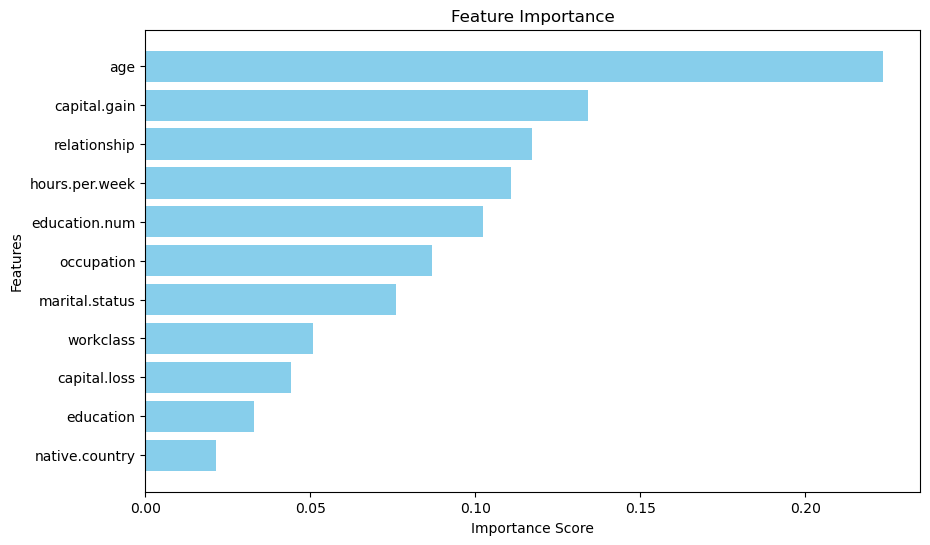

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Splitting the data
X6 = data.drop(columns=['income']) 
y6 = data['income'] 

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model6 = RandomForestClassifier(n_estimators=100, random_state=42)
model6.fit(X_train6, y_train6)

# Predictions
y_pred6 = model6.predict(X_test6)
y_pred_prob6 = model6.predict_proba(X_test6)[:, 1]  # Probabilities for the positive class

# Evaluation
print("Accuracy:", accuracy_score(y_test6, y_pred6))
print("\nClassification Report:\n", classification_report(y_test6, y_pred6))
print("\nConfusion Matrix:\n", confusion_matrix(y_test6, y_pred6))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test6, y_pred_prob6)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature Importance Visualization
importances = model6.feature_importances_
feature_names = X6.columns
sorted_indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_indices], importances[sorted_indices], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [56]:
pip install PySimpleGUI


Note: you may need to restart the kernel to use updated packages.


In [57]:
import PySimpleGUI as sg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# PySimpleGUI layout
layout = [
    [sg.Text('KNN Classifier GUI')],
    [sg.Text('Enter feature values:')],
    [sg.Text('Age'), sg.InputText(key='-AGE-')],
    [sg.Text('Workclass'), sg.InputText(key='-WORKCLASS-')],
    [sg.Text('Education'), sg.InputText(key='-EDUCATION-')],
    [sg.Text('Education Number'), sg.InputText(key='-EDUCATION.NUM-')],
    [sg.Text('Marital Status'), sg.InputText(key='-MARITAL.STATUS-')],
    [sg.Text('Occupation'), sg.InputText(key='-OCCUPATION-')],
    [sg.Text('Relationship'), sg.InputText(key='-RELATIONSHIP-')],
    [sg.Text('Capital Gain'), sg.InputText(key='-CAPITAL.GAIN-')],
    [sg.Text('Capital Loss'), sg.InputText(key='-CAPITAL.LOSS-')],
    [sg.Text('Hours per Week'), sg.InputText(key='-HOURS.PER.WEEK-')],
    [sg.Text('Native Country'), sg.InputText(key='-NATIVE.COUNTRY-')],
    [sg.Button('Predict'), sg.Button('Exit')],
    [sg.Text('', size=(30, 1), key='-OUTPUT-')],
    [sg.Text(f'Training Accuracy: {training_accuracy3:.2f}')],
    [sg.Text(f'Testing Accuracy: {testing_accuracy3:.2f}')],
]

# Create the window
window = sg.Window('KNN Classifier with 7 Neighbors', layout)

# Event loop
while True:
    event, values = window.read()
    
    if event == sg.WINDOW_CLOSED or event == 'Exit':
        break
    
    if event == 'Predict':
        try:
            # Extract input features from the GUI and encode categorical values
            feature_values = [
                float(values['-AGE-']),
                label_encoder.fit_transform([values['-WORKCLASS-']])[0],  # Encoding categorical feature
                label_encoder.fit_transform([values['-EDUCATION-']])[0],  # Encoding categorical feature
                float(values['-EDUCATION.NUM-']),
                label_encoder.fit_transform([values['-MARITAL.STATUS-']])[0],  # Encoding categorical feature
                label_encoder.fit_transform([values['-OCCUPATION-']])[0],  # Encoding categorical feature
                label_encoder.fit_transform([values['-RELATIONSHIP-']])[0],  # Encoding categorical feature
                float(values['-CAPITAL.GAIN-']),
                float(values['-CAPITAL.LOSS-']),
                float(values['-HOURS.PER.WEEK-']),
                label_encoder.fit_transform([values['-NATIVE.COUNTRY-']])[0],  # Encoding categorical feature
            ]
            
            # Make a prediction
            prediction = model3.predict([feature_values])[0]
           # Map numeric prediction to income class string
            if prediction == 1:
                predicted_class = '>50K'
            else:
                predicted_class = '<=50K'
            
            # Display the predicted class
            window['-OUTPUT-'].update(f'Predicted Class: {predicted_class}')  
        
        except ValueError:
            window['-OUTPUT-'].update('Invalid input. Please enter numerical values.')

# Close the window
window.close()

C:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
